In [34]:
from os.path import join as jn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = jn("..", "..", "..", "")
DATA = jn(ROOT, "results", "dataframes", "")
FIGURES = jn(ROOT, "results", "figures", "")

# Preprocessing

In [35]:
df = pd.read_csv(jn(DATA, "dataframe_ex-mu-gamma.csv"))
df.head()

,system,theta,embedding,mu,t1,t2,prob,accuracy,auroc,pr,intercept,coef_distances,coef_degrees
0,LFR,0.3,HOPE,0.10,2.1,1.0,1,0.816782,0.900436,0.900100,-0.058418,-7.838608,-6.790020
1,LFR,0.3,HOPE,0.14,2.1,1.0,1,0.803473,0.887694,0.886885,0.012746,-7.976779,-7.107731
2,LFR,0.3,HOPE,0.19,2.1,1.0,1,0.813786,0.895820,0.896047,-0.036205,-8.724759,-7.299840
3,LFR,0.3,HOPE,0.10,2.1,1.0,1,0.810269,0.895267,0.894874,-0.037777,-8.082335,-6.566838
4,LFR,0.3,HOPE,0.23,2.1,1.0,1,0.797322,0.881781,0.879774,0.006810,-8.925822,-6.894841


In [36]:
df = df.query("t1 < 4.0")
df = df.drop(columns=['system', 'theta', 't2', 'prob'])

In [37]:
df["relative_impact"] = np.abs(df["coef_distances"]) / (np.abs(df["coef_degrees"]) + np.abs(df["coef_distances"]))

# Visualizations

## Performance

In [38]:
df_ = df.query("embedding == 'N2V'")
df_ = df_.pivot_table(index='mu', columns='t1', values='auroc').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'N2V performance')]

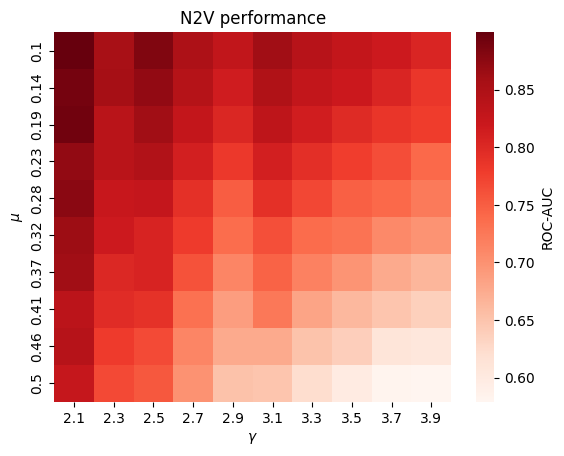

In [39]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Reds",
    cbar_kws = {"label": "ROC-AUC"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="N2V performance")

In [40]:
df_ = df.query("embedding == 'LE'")
df_ = df_.pivot_table(index='mu', columns='t1', values='auroc').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'LE performance')]

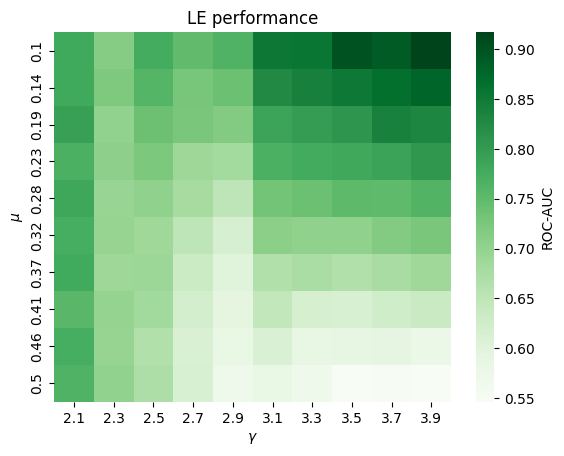

In [41]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Greens",
    cbar_kws = {"label": "ROC-AUC"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="LE performance")

In [42]:
df_ = df.query("embedding == 'HOPE'")
df_ = df_.pivot_table(index='mu', columns='t1', values='auroc').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'HOPE performance')]

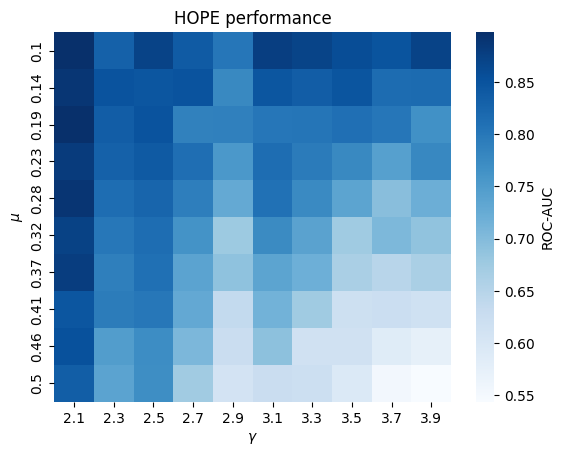

In [43]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Blues",
    cbar_kws = {"label": "ROC-AUC"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="HOPE performance")

## Coefficients

In [44]:
df_ = df.query("embedding == 'N2V'")
df_ = df_.pivot_table(index='mu', columns='t1', values='relative_impact').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'N2V coefficients')]

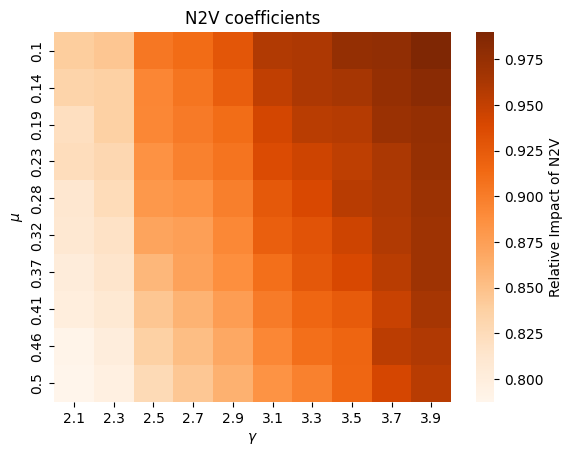

In [45]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Oranges",
    cbar_kws = {"label": "Relative Impact of N2V"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="N2V coefficients")

In [46]:
df_ = df.query("embedding == 'LE'")
df_ = df_.pivot_table(index='mu', columns='t1', values='relative_impact').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'LE coefficients')]

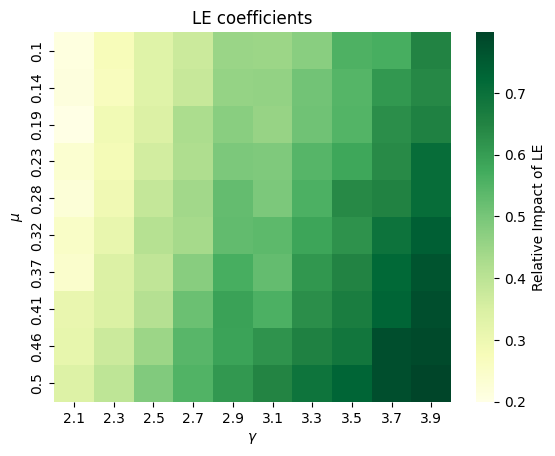

In [47]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="YlGn",
    cbar_kws = {"label": "Relative Impact of LE"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="LE coefficients")

In [48]:
df_ = df.query("embedding == 'HOPE'")
df_ = df_.pivot_table(index='mu', columns='t1', values='relative_impact').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'HOPE coefficients')]

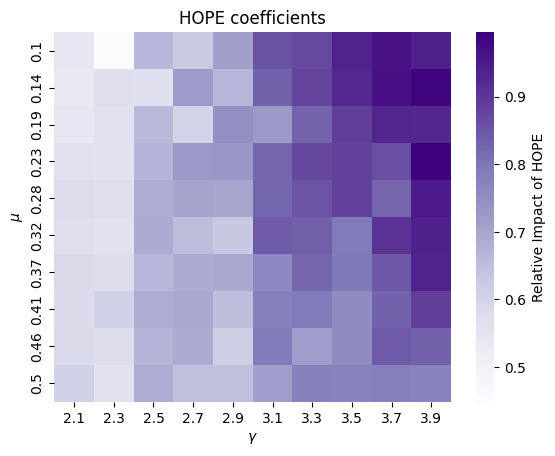

In [49]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Purples",
    cbar_kws = {"label": "Relative Impact of HOPE"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="HOPE coefficients")